# SPAM SMS DETECTION

**Input data files are available in the current working directory**
**By running this files all the cells, we will be able to find the results of spam detection with Natural language processing and performance of different models**
**Natural Language Processing is  basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!**

**NLTK should be installed, along with downloading the corpus for stopwords. Download using nltk.download()**

**Now, we are going to see NLP techniques to classify SMS into Ham or Spam using different Machine Learning Models.**

In [46]:
# importing Libraries

import numpy as np # For numerical analysis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting graphs
import nltk # for text processing
import os # for system based operations
import seaborn as sns
%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn import decomposition, ensemble
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#print(os.listdir("../"))
print(os.getcwd()) # to chech the current working directory
# if needed results can be saved too.

/Users/Desh/Downloads


## Lets first get the Data in a Dataframe
The dataset downloaded file contains a collection of more than 5 thousand SMS phone messages.


In [2]:
spam_test_dataframe = pd.read_csv(os.getcwd() + '/sms_spam.csv',names= ['label', 'feature']) # read csv as we have a csv file to read

spam_test_dataframe.head() # to print first 5 rows of data frame

,label,feature
0,type,text
1,ham,Hope you are having a good week. Just checking in
2,ham,K..give back my thanks.
3,ham,Am also doing in cbe only. But have to pay.
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."


As we can see that first row contains header, we need to remove them first.

In [3]:
spam_test_dataframe.dropna()
spam_test_dataframe=spam_test_dataframe.iloc[1:]

In [4]:
spam_test_dataframe.isnull().values.any()

False

In [5]:
spam_test_dataframe.head()

,label,feature
1,ham,Hope you are having a good week. Just checking in
2,ham,K..give back my thanks.
3,ham,Am also doing in cbe only. But have to pay.
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
5,spam,okmail: Dear Dave this is your final notice to...


## Data Analysis

First we will analyse the data which we have received and then we will do machine learning on it.

In [6]:
spam_test_dataframe.describe() # this describe how our dataset looks like

,label,feature
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [7]:
spam_test_dataframe.groupby('label').describe() #this describe our lablel column

feature                                                               
        count unique                                                top freq
label                                                                       
ham      4812   4503                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

As suspected length of message could bre really useful to identify the spam or a ham sms.

Let us add another column called length of feature which will have how much does the message length is.

In [8]:
spam_test_dataframe['length'] = spam_test_dataframe['feature'].apply(len)
spam_test_dataframe.head()

,label,feature,length
1,ham,Hope you are having a good week. Just checking in,49
2,ham,K..give back my thanks.,23
3,ham,Am also doing in cbe only. But have to pay.,43
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
5,spam,okmail: Dear Dave this is your final notice to...,161


### Data Visualization
Lets Analyse the data before we do some machine learning

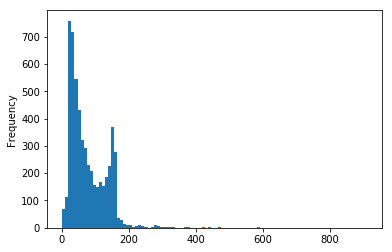

In [9]:
spam_test_dataframe['length'].plot(bins=100, kind='hist') 

In [11]:
spam_test_dataframe.length.describe()

count    5559.000000
mean       79.781436
std        59.105497
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

So the message with longest length is of 910 characters

In [12]:
spam_test_dataframe[spam_test_dataframe['length'] == 910]['feature'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

So this SMS message was sent by one person to other personally so it is ham. But this does not help much in Ham Spam identification

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f1a8470>,
      dtype=object)

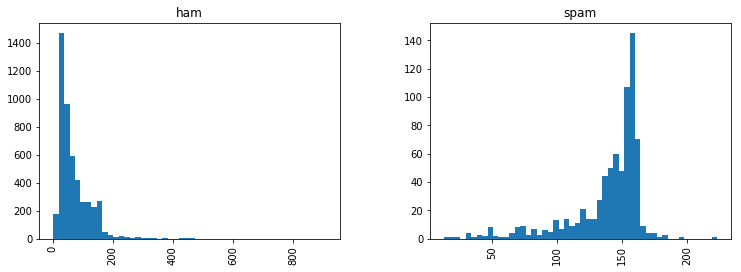

In [13]:
spam_test_dataframe.hist(column='length', by='label', bins=50,figsize=(12,4))

Our data is text data so first it should be in a vector format which is then input to machine learning model.
In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

Step1: Do some preprocessing like removing punctuation, stop words etc.
Step2: Do some advance text processing like converting to bag of words, N-gram etc.
Step3: Machine Learning model fit adn transform
Step4: Model accuracy check.
Let's first start with with step 1 and then rest will follow.

# Machine Learning Step

In [14]:
import string
from nltk.corpus import stopwords

In [15]:
# text pre-processing
spam_test_dataframe['feature'] = spam_test_dataframe['feature'].str.replace('[^\w\s]','')
spam_test_dataframe['feature'] = spam_test_dataframe['feature'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
spam_test_dataframe['feature'] = spam_test_dataframe['feature'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [16]:
# Check to make sure its working
spam_test_dataframe['feature'].head()

1                              hope good week checking
2                                    kgive back thanks
3                                         also cbe pay
4    complimentary 4 star ibiza holiday 10000 cash ...
5    okmail dear dave final notice collect 4 teneri...
Name: feature, dtype: object

Lets do something even better beside above techniques, lets shorten the terms to their stem form.

In [17]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [18]:
spam_test_dataframe['feature'] = spam_test_dataframe['feature'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

we will use pipelines to make the steps short. 
The pipeline will do the vectorization, Term frequcz transformation and model fitting together.

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:
To transform the entire bag-of-words corpus into TF-IDF corpus at once:

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(spam_test_dataframe['feature'].values.astype('U'), spam_test_dataframe['label'], test_size=0.2, random_state=1)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

4447 1112 5559


The test size is 20% of the entire dataset (1112 messages out of total 5559), and the training is the rest (4447 out of 5559). Note the default split would have been 30/70.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

Using scikit-learn here, choosing the Naive Bayes, Decision Tree, Random Forest, Support Vector Machine classifiers to start with:
In the end we will compare the accuracy of each model.


# Naive Bayes

In [32]:
# Pipelining 
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])
text_clf = text_clf.fit(X_train, y_train)
# using GridSearch CV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3),}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
gs_clf.best_score_
gs_clf.best_params_
predicted_nb = gs_clf.predict(X_test)
print(predicted_nb)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


Lets build other models too as promised earlier.

# Decision Tree

In [25]:
# Decisiton Tree Pipelining 
dt = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-dt', DecisionTreeClassifier(criterion = "gini", splitter="best",
                                                           max_depth=20, random_state = 42)),])
_ = dt.fit(X_train, y_train)

predicted_dt = dt.predict(X_test) 
print(predicted_dt)

# Random Forest

In [26]:
# Pipelining 
rf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-rf', RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 42)),])
_ = rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test) 
print(predicted_rf)   

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


# Support Vector Machine

In [27]:
# using SVM
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5, random_state=42)),])
_ = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
print(predicted_svm)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


# Classification Report
Lets develop the classification report for all above models

In [29]:
from sklearn.metrics import classification_report
target_names = ['Features', 'Labels']

In [33]:
print(classification_report(y_test, predicted_nb, target_names=target_names))

             precision    recall  f1-score   support

   Features       0.86      1.00      0.93       957
     Labels       1.00      0.01      0.01       155

avg / total       0.88      0.86      0.80      1112



In [34]:
print(classification_report(y_test, predicted_dt, target_names=target_names))

             precision    recall  f1-score   support

   Features       0.86      1.00      0.93       957
     Labels       0.00      0.00      0.00       155

avg / total       0.74      0.86      0.80      1112



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
print(classification_report(y_test, predicted_rf, target_names=target_names))

             precision    recall  f1-score   support

   Features       0.86      1.00      0.93       957
     Labels       0.00      0.00      0.00       155

avg / total       0.74      0.86      0.80      1112



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print(classification_report(y_test, predicted_svm, target_names=target_names))

             precision    recall  f1-score   support

   Features       0.86      1.00      0.93       957
     Labels       1.00      0.01      0.01       155

avg / total       0.88      0.86      0.80      1112



# Accuracy Score

In [41]:
precision_nb = accuracy_score(y_test, predicted_nb)
print("Naive Bayes Accuracy Score: ", precision_nb)

Naive Bayes Accuracy Score:  0.8615107913669064


In [42]:
precision_dt = accuracy_score(y_test, predicted_dt)
print("Decision Tree Accuracy Score: ", precision_dt)

Decision Tree Accuracy Score:  0.8606115107913669


In [43]:
precision_rf = accuracy_score(y_test, predicted_rf)
print("Random Forest Accuracy Score: ", precision_dt)

Random Forest Accuracy Score:  0.8606115107913669


In [44]:
precision_svm = accuracy_score(y_test, predicted_svm)
print("Support Vector Machine Accuracy Score: ", precision_dt)

Support Vector Machine Accuracy Score:  0.8606115107913669


In [45]:
highest = max(precision_nb, precision_dt, precision_rf, precision_svm)
print("the the highest accuracy is: ", highest)

the the highest accuracy is:  0.8615107913669064


**So, our model predicted very well on the dataset with an accuracy about 86%. If we fine tune our model, our accuracy could increase.**